In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("used_cars_dataset.csv")

In [3]:
data.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,450000


In [4]:
data.tail(10)

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
4330,Tata Indica Vista Aqua 1.4 TDI,2010,130000,Diesel,Individual,Manual,Second Owner,150000
4331,Ford EcoSport 1.5 TDCi Titanium BSIV,2015,175000,Diesel,Individual,Manual,Third Owner,530000
4332,Mahindra Scorpio S2 7 Seater,2015,120000,Diesel,Individual,Manual,First Owner,750000
4333,Maruti Ritz VDi,2012,90000,Diesel,Individual,Manual,Second Owner,225000
4334,Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV,2012,170000,Diesel,Individual,Manual,First Owner,600000
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,80000,Diesel,Individual,Manual,Second Owner,409999
4336,Hyundai i20 Magna 1.4 CRDi,2014,80000,Diesel,Individual,Manual,Second Owner,409999
4337,Maruti 800 AC BSIII,2009,83000,Petrol,Individual,Manual,Second Owner,110000
4338,Hyundai Creta 1.6 CRDi SX Option,2016,90000,Diesel,Individual,Manual,First Owner,865000
4339,Renault KWID RXT,2016,40000,Petrol,Individual,Manual,First Owner,225000


In [5]:
data.describe()

,year,km_driven,selling_price
count,4340.000000,4340.000000,4.340000e+03
mean,2013.090783,66215.777419,5.041273e+05
std,4.215344,46644.102194,5.785487e+05
min,1992.000000,1.000000,2.000000e+04
25%,2011.000000,35000.000000,2.087498e+05
50%,2014.000000,60000.000000,3.500000e+05
75%,2016.000000,90000.000000,6.000000e+05
max,2020.000000,806599.000000,8.900000e+06


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   object
 4   seller_type    4340 non-null   object
 5   transmission   4340 non-null   object
 6   owner          4340 non-null   object
 7   selling_price  4340 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
data.shape

(4340, 8)

In [14]:
data.columns

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'selling_price'],
      dtype='object')

In [8]:
import numpy as np

car_data = data.select_dtypes(include=[np.number]).dropna()

In [16]:
if 'selling_price' in car_data.columns:
    target_col = 'selling_price'
elif 'price' in car_data.columns:
    target_col = 'price'
else:
    raise ValueError("Could not find a column for price in the dataset. Please check the column names.")


X_car = car_data.drop(columns=[target_col])
y_car = car_data[target_col]

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_car, y_car, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

lr_car = LinearRegression()
lr_car.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred_car = lr_car.predict(X_test)

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

R2 = r2_score(y_test, y_pred_car)
MAE = mean_absolute_error(y_test, y_pred_car)
MSE = mean_squared_error(y_test, y_pred_car)
RMSE = np.sqrt(MSE)

print("Used Car Price Model Performance")
print(f"R² Score: ", R2)
print(f"MAE: ", MAE)
print(f"MSE: ", MSE)
print(f"RMSE: ", RMSE)

Used Car Price Model Performance
R² Score:  0.1620831376822649
MAE:  256362.48559820454
MSE:  255707328588.57532
RMSE:  505675.12158358685


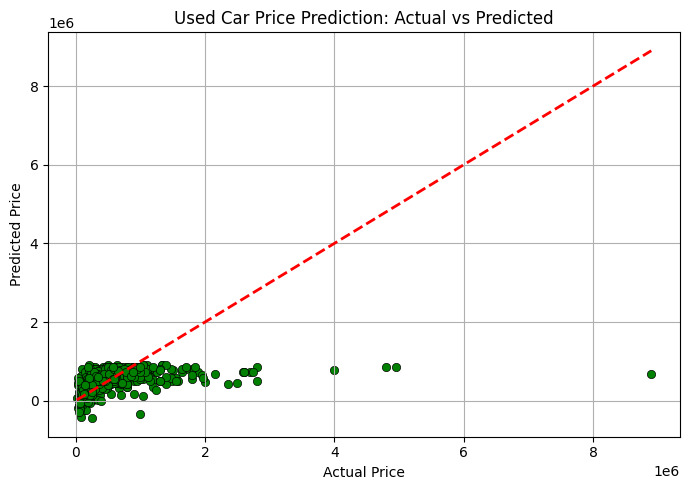

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred_car, color='green', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Used Car Price Prediction: Actual vs Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()